Convolutional Neural Network - Dogs vs. Cats Classification

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle competitions download -c dogs-vs-cats

 99% 805M/812M [00:06<00:00, 54.6MB/s]
100% 812M/812M [00:06<00:00, 126MB/s] 


In [ ]:
!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("dogs_vs_cats_small")

def make_subset (subset_name, start_index, end_index):
  for category in ("cat", "dog"):
    dir = new_base_dir / subset_name / category
    os.makedirs(dir)
    fnames = [f"{category}.{i}.jpg" for i in range(start_index,end_index)]

    for fname in fnames:
      shutil.copyfile(src=original_dir / fname,dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

cninputs = keras.Input(shape=(180,180,3))
x = layers.Rescaling(1./255)(cninputs)
x = layers.Conv2D(filters=32,kernel_size=3,activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64,kernel_size=3,activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128,kernel_size=3,activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256,kernel_size=3,activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256,kernel_size=3,activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
model = keras.Model(inputs=cninputs,outputs=outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

Image Pre-processing

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(new_base_dir / "train", image_size=(180,180),batch_size=32)
validation_dataset = image_dataset_from_directory(new_base_dir / "validation", image_size=(180,180),batch_size=32)
test_dataset = image_dataset_from_directory(new_base_dir / "test", image_size=(180,180),batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
callbacks = [keras.callbacks.ModelCheckpoint(
    filepath="covnet.keras",
    save_best_only=True,
    monitor="val_loss")
]

history = model.fit(train_dataset,epochs=30,validation_data=validation_dataset,callbacks=callbacks)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 239s 4s/step - accuracy: 0.5257 - loss: 0.7416 - val_accuracy: 0.5640 - val_loss: 0.6919
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 215s 3s/step - accuracy: 0.5401 - loss: 0.6931 - val_accuracy: 0.5010 - val_loss: 0.6894
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 255s 3s/step - accuracy: 0.5157 - loss: 0.6903 - val_accuracy: 0.6230 - val_loss: 0.6402
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 268s 3s/step - accuracy: 0.6406 - loss: 0.6587 - val_accuracy: 0.6250 - val_loss: 0.6423
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 253s 3s/step - accuracy: 0.6568 - loss: 0.6184 - val_accuracy: 0.6500 - val_loss: 0.6163
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 212s 3s/step - accuracy: 0.6526 - loss: 0.5990 - val_accuracy: 0.6220 - val_loss: 0.6523
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 208s 3s/step - accuracy: 0.6843 - loss: 0.5792 - val_accuracy: 0.6720 - val_loss: 0.6174
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 276s 4s/step - accuracy: 0.7376 - loss: 0.5555 - val_accuracy: 0.7010 - v

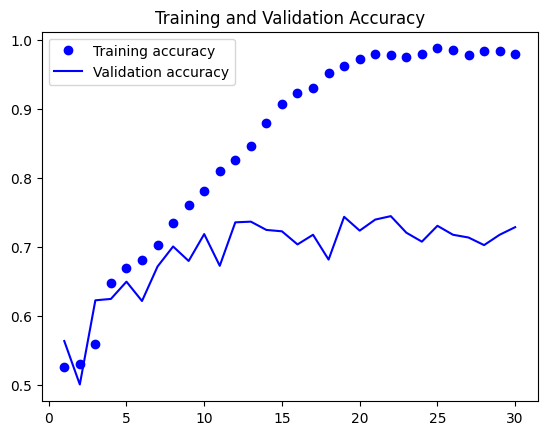

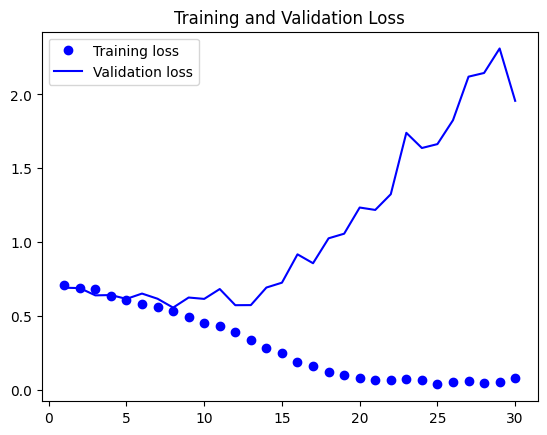

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1,len(accuracy)+1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("covnet.keras")
test_loss, test_accuracy = test_model.evaluate(test_dataset)
print(f"Test accuracy = {test_accuracy:.3f}")
print(f"Test loss = {test_loss:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 54s 857ms/step - accuracy: 0.6733 - loss: 0.5874
Test accuracy = 0.688
Test loss = 0.584
